1. Upload Dataset

In [27]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


2. Reading Data

In [28]:
import pandas as pd

df = pd.read_csv("heart.csv")

df.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
414,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
248,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
356,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
781,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0


In [29]:
3. df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


4. Pandas Profiling Raport

In [42]:
from ydata_profiling import ProfileReport
import pandas as pd

In [30]:
from ydata_profiling import ProfileReport  # jika sudah install ydata-profiling
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


df = pd.read_csv("heart.csv")


profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 35.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
from ydata_profiling import ProfileReport
import pandas as pd
profile = ProfileReport(df, title="Profiling Report", explorative=True)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 65.53it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

5. Missingo - Missing Data

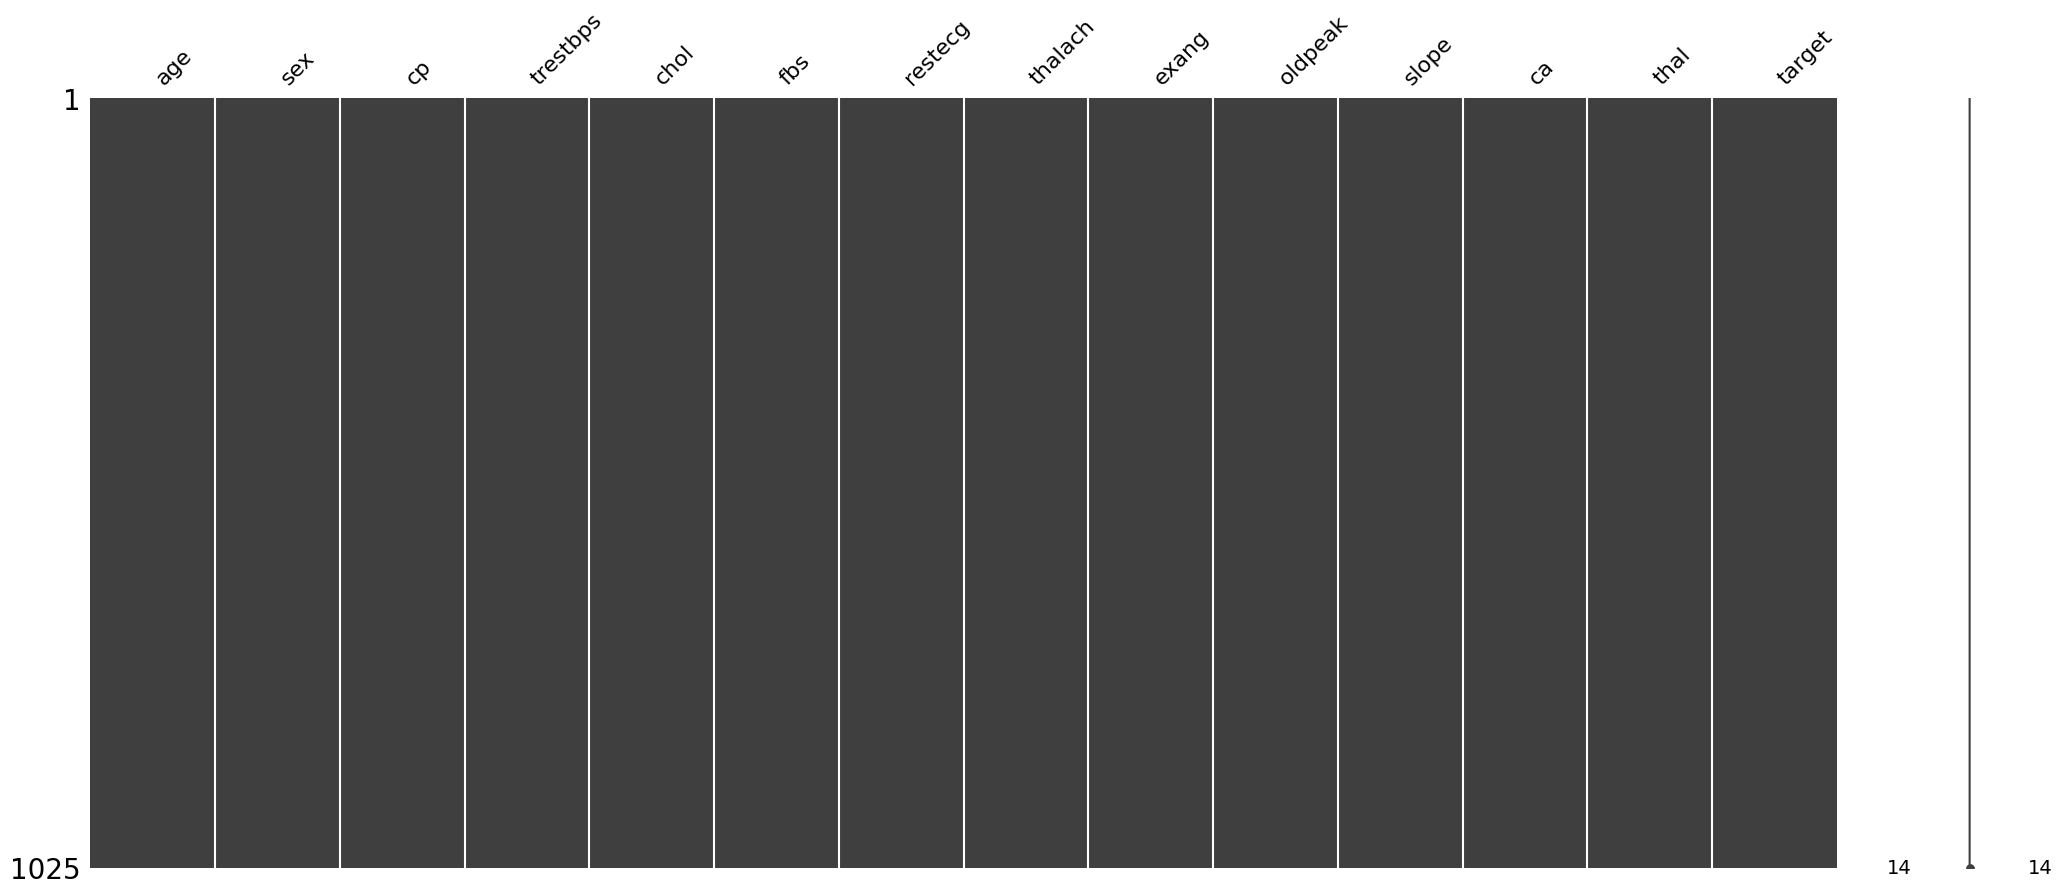

In [32]:
import missingno as msno
msno.matrix(df)
plt.show()

6. Seaborn - Heatmap

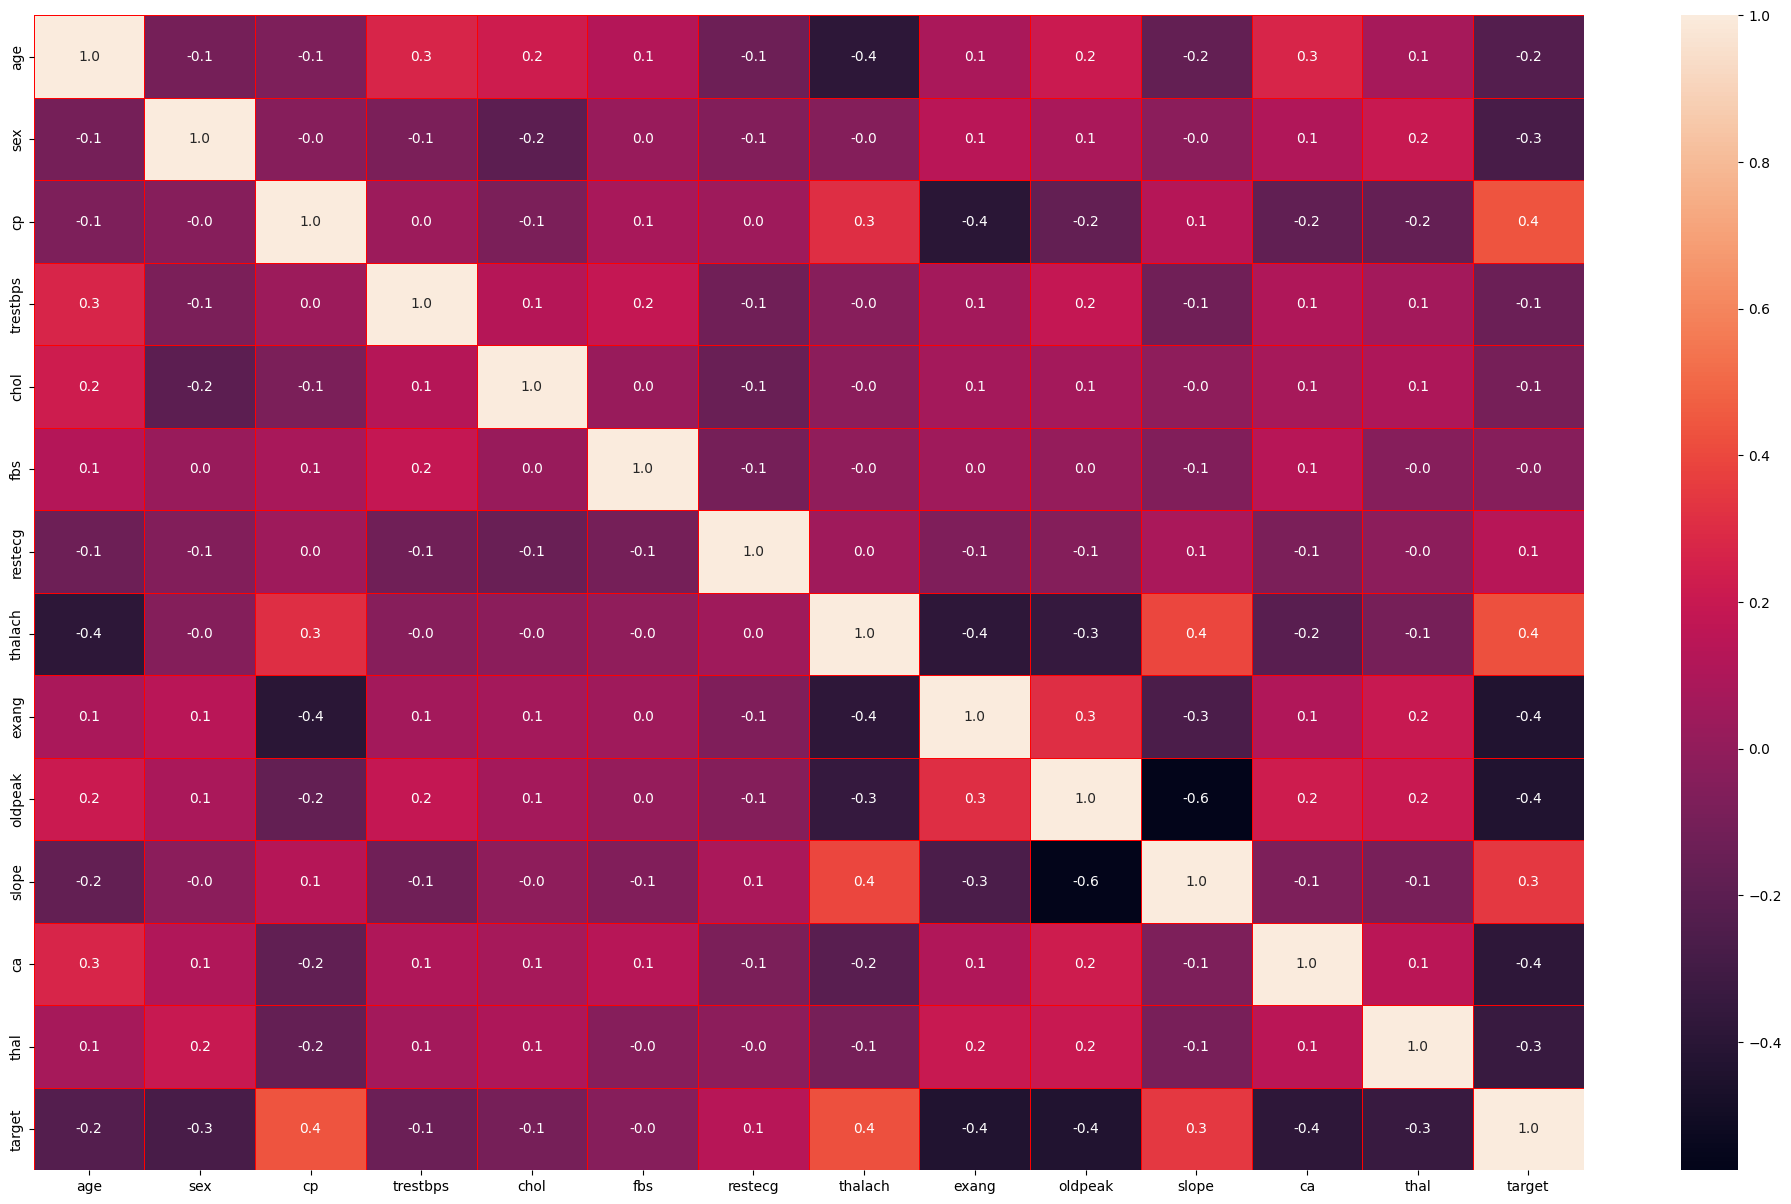

In [52]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

7. Separating Features and Labels

In [53]:
X=df.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [45]:
y=df.iloc[:,-1]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


8. Data Standardisation

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

9. Spiliting Dataset into Training Set and Testing Set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

10. Build Naive Bayes Model with Default Hyperparameter

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

11. Accuracy Score

In [49]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8


12. Cunfusion Matrix with Seaborn - Heatmap

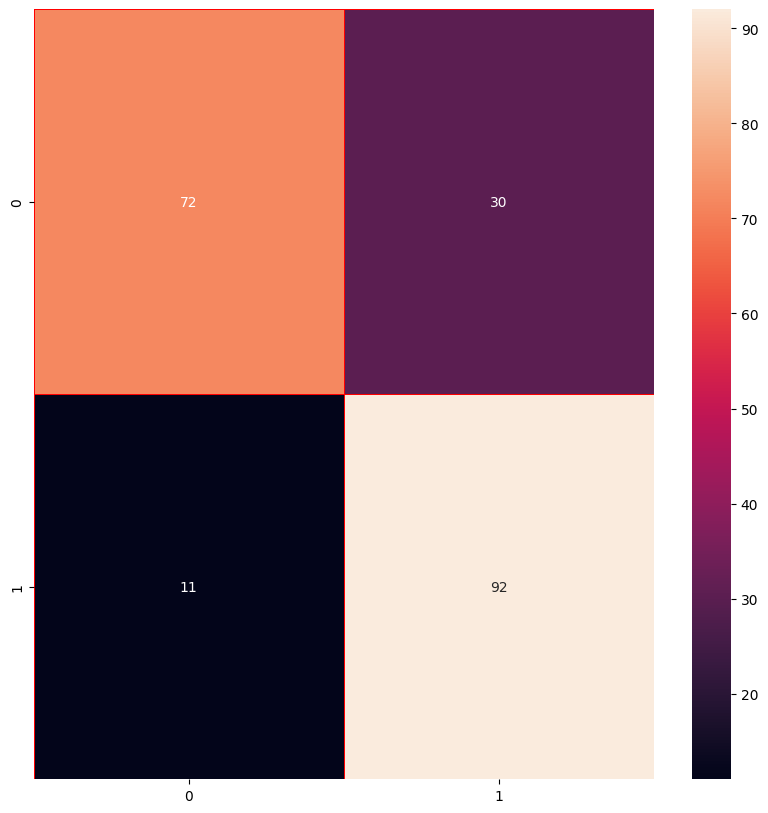

<Figure size 640x480 with 0 Axes>

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

13. F1 Score

In [55]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.8177777777777778
